# Pandas Overview

#### From the Pandas documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

# Quick Introduction

In [1]:
import pandas as pd  ##
import numpy as np    ## Arrays and matrices
import matplotlib.pyplot as plt  ## Plots and charts
%matplotlib inline   

/Users/peter/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
pd.__version__

u'0.18.0'

In [3]:
np.__version__

'1.10.4'

In [4]:
import matplotlib
matplotlib.__version__

'1.5.0'

## Basic data structures

### 1. Series (1-dim'l)

In [5]:
pd.Series?

In [54]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8]); s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
## Make a Series with custom indices 
s = pd.Series([1,3,5,np.nan,6,np.inf], ['a', 'b', 'c', 'd', 'e', 'f']); s

a    1.000000
b    3.000000
c    5.000000
d         NaN
e    6.000000
f         inf
dtype: float64

In [8]:
s['a']  ## Lookup an entry by index label

1.0

In [9]:
s[3]  ## Lookup an entry by the numerical index

nan

In [10]:
## Some different lookup examples
#s
#s.loc['a']
#s['a']
#s.iloc[2]

In [11]:
type(s[3])

numpy.float64

In [12]:
## Make a "time series" Series
rng = pd.date_range('1/1/2011', periods=10, freq='H')
ts = pd.Series([x*x  for x in range(10)], rng);
ts

2011-01-01 00:00:00     0
2011-01-01 01:00:00     1
2011-01-01 02:00:00     4
2011-01-01 03:00:00     9
2011-01-01 04:00:00    16
2011-01-01 05:00:00    25
2011-01-01 06:00:00    36
2011-01-01 07:00:00    49
2011-01-01 08:00:00    64
2011-01-01 09:00:00    81
Freq: H, dtype: int64

In [13]:
## Tell me some useful info about the timeseries
ts.describe()

count    10.000000
mean     28.500000
std      28.304888
min       0.000000
25%       5.250000
50%      20.500000
75%      45.750000
max      81.000000
dtype: float64

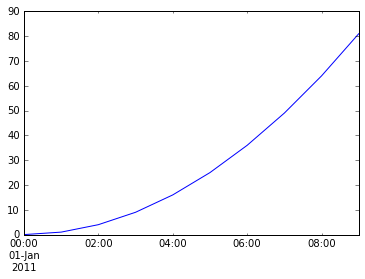

In [14]:
## Plot the timeseries
ts.plot()

In [15]:
## Add two Series
ts + ts

2011-01-01 00:00:00      0
2011-01-01 01:00:00      2
2011-01-01 02:00:00      8
2011-01-01 03:00:00     18
2011-01-01 04:00:00     32
2011-01-01 05:00:00     50
2011-01-01 06:00:00     72
2011-01-01 07:00:00     98
2011-01-01 08:00:00    128
2011-01-01 09:00:00    162
Freq: H, dtype: int64

In [16]:
## Multiply two Series
ts * ts

2011-01-01 00:00:00       0
2011-01-01 01:00:00       1
2011-01-01 02:00:00      16
2011-01-01 03:00:00      81
2011-01-01 04:00:00     256
2011-01-01 05:00:00     625
2011-01-01 06:00:00    1296
2011-01-01 07:00:00    2401
2011-01-01 08:00:00    4096
2011-01-01 09:00:00    6561
Freq: H, dtype: int64

In [17]:
## Scale a Series
5 * ts

2011-01-01 00:00:00      0
2011-01-01 01:00:00      5
2011-01-01 02:00:00     20
2011-01-01 03:00:00     45
2011-01-01 04:00:00     80
2011-01-01 05:00:00    125
2011-01-01 06:00:00    180
2011-01-01 07:00:00    245
2011-01-01 08:00:00    320
2011-01-01 09:00:00    405
Freq: H, dtype: int64

In [18]:
## Add two Series with different labels
ts + s

2011-01-01 00:00:00   NaN
2011-01-01 01:00:00   NaN
2011-01-01 02:00:00   NaN
2011-01-01 03:00:00   NaN
2011-01-01 04:00:00   NaN
2011-01-01 05:00:00   NaN
2011-01-01 06:00:00   NaN
2011-01-01 07:00:00   NaN
2011-01-01 08:00:00   NaN
2011-01-01 09:00:00   NaN
a                     NaN
b                     NaN
c                     NaN
d                     NaN
e                     NaN
f                     NaN
dtype: float64

In [19]:
## Make another timeseries
rng1 = pd.date_range('1/1/2011', periods=4, freq='2H')
ts1 = pd.Series(4 * [7], rng1);
ts1

2011-01-01 00:00:00    7
2011-01-01 02:00:00    7
2011-01-01 04:00:00    7
2011-01-01 06:00:00    7
Freq: 2H, dtype: int64

In [20]:
ts

2011-01-01 00:00:00     0
2011-01-01 01:00:00     1
2011-01-01 02:00:00     4
2011-01-01 03:00:00     9
2011-01-01 04:00:00    16
2011-01-01 05:00:00    25
2011-01-01 06:00:00    36
2011-01-01 07:00:00    49
2011-01-01 08:00:00    64
2011-01-01 09:00:00    81
Freq: H, dtype: int64

In [21]:
## Add them -- notice how overlaps are handled gracefully!
ts2 = ts + ts1
ts2

2011-01-01 00:00:00     7.0
2011-01-01 01:00:00     NaN
2011-01-01 02:00:00    11.0
2011-01-01 03:00:00     NaN
2011-01-01 04:00:00    23.0
2011-01-01 05:00:00     NaN
2011-01-01 06:00:00    43.0
2011-01-01 07:00:00     NaN
2011-01-01 08:00:00     NaN
2011-01-01 09:00:00     NaN
dtype: float64

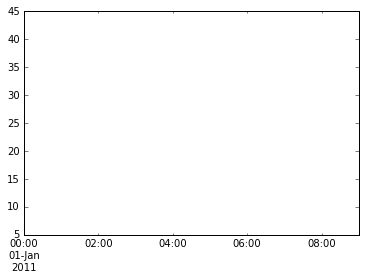

In [22]:
## Try to plot this -- not so good. =(
ts2.plot()

In [23]:
## Extract the null dates
ts2[pd.isnull(ts2)]

2011-01-01 01:00:00   NaN
2011-01-01 03:00:00   NaN
2011-01-01 05:00:00   NaN
2011-01-01 07:00:00   NaN
2011-01-01 08:00:00   NaN
2011-01-01 09:00:00   NaN
dtype: float64

In [24]:
## Extract the large values
ts2[ts2 > 10]

2011-01-01 02:00:00    11.0
2011-01-01 04:00:00    23.0
2011-01-01 06:00:00    43.0
dtype: float64

In [25]:
## Extract the medium values
ts2[(ts2 > 10) & (ts2 < 40)]

2011-01-01 02:00:00    11.0
2011-01-01 04:00:00    23.0
dtype: float64

In [26]:
## Extract the "good" (non-null) values
ts2_good = ts2[pd.notnull(ts2)]
ts2_good

2011-01-01 00:00:00     7.0
2011-01-01 02:00:00    11.0
2011-01-01 04:00:00    23.0
2011-01-01 06:00:00    43.0
dtype: float64

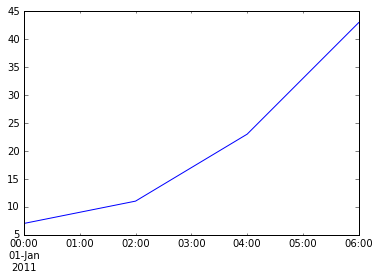

In [27]:
## Plot the good/cleaned series
ts2_good.plot()

### Dates and times in Pandas


In [28]:
## Make an index of dates
dates = pd.date_range('20130101', periods=6); dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
## Extract one of them -- it's *not* a datetime object!
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [30]:
dates[0] + 17

Timestamp('2013-01-18 00:00:00', offset='D')

In [31]:
dates[0] + 40

Timestamp('2013-02-10 00:00:00', offset='D')

In [32]:
pd.Timestamp("2015-06-02")

Timestamp('2015-06-02 00:00:00')

In [33]:
pd.Timestamp("6/2/2015")

Timestamp('2015-06-02 00:00:00')

### 2. Dataframes (2-dim'l)

In [34]:
## Make a range of dates
dates = pd.date_range('20130101', periods=6); dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [35]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [36]:
## Make a dataframe from a numpy array
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 
df

,A,B,C,D
2013-01-01,-1.114678,-0.185515,1.270972,-0.467170
2013-01-02,0.499397,-0.519278,-0.742927,-0.115409
2013-01-03,-0.911109,-0.453548,1.097614,1.925419
2013-01-04,-0.467506,-1.160604,0.872049,0.887651
2013-01-05,0.843684,2.023463,-1.544952,-0.554060
2013-01-06,0.299603,-1.284713,-0.047733,-1.690726


In [37]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({ 'A' : 1., \
                    'B' : pd.Timestamp('20130102'), \
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'), \
                    'D' : np.array([3] * 4,dtype='int32'), \
                    'E' : pd.Categorical(["test","train","test","train"]), \
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [38]:
## Look at the column types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [39]:
## Look at the first few rows
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [40]:
## Look at the last few rows
df2.tail()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [41]:
## What are the column names?
df2.columns

Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object')

In [42]:
## What are the rows?  (as a numpy array!)
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)

In [43]:
## Some useful info about the dataframe
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [44]:
df2.mean()

A    1.0
C    1.0
D    3.0
dtype: float64

In [45]:
## Take the transpose of the dataframe
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


### Sorting in dataframes

In [46]:
## Sorting by an axis (i.e. by index or column labels)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.467170,1.270972,-0.185515,-1.114678
2013-01-02,-0.115409,-0.742927,-0.519278,0.499397
2013-01-03,1.925419,1.097614,-0.453548,-0.911109
2013-01-04,0.887651,0.872049,-1.160604,-0.467506
2013-01-05,-0.554060,-1.544952,2.023463,0.843684
2013-01-06,-1.690726,-0.047733,-1.284713,0.299603


In [47]:
## Sorting by values
df.sort(columns='B')

/Users/peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,A,B,C,D
2013-01-06,0.299603,-1.284713,-0.047733,-1.690726
2013-01-04,-0.467506,-1.160604,0.872049,0.887651
2013-01-02,0.499397,-0.519278,-0.742927,-0.115409
2013-01-03,-0.911109,-0.453548,1.097614,1.925419
2013-01-01,-1.114678,-0.185515,1.270972,-0.467170
2013-01-05,0.843684,2.023463,-1.544952,-0.554060


In [48]:
df

,A,B,C,D
2013-01-01,-1.114678,-0.185515,1.270972,-0.467170
2013-01-02,0.499397,-0.519278,-0.742927,-0.115409
2013-01-03,-0.911109,-0.453548,1.097614,1.925419
2013-01-04,-0.467506,-1.160604,0.872049,0.887651
2013-01-05,0.843684,2.023463,-1.544952,-0.554060
2013-01-06,0.299603,-1.284713,-0.047733,-1.690726


### Selecting elements

In [49]:
## Pull out a column (Series) from the dataframe
df['A']

2013-01-01   -1.114678
2013-01-02    0.499397
2013-01-03   -0.911109
2013-01-04   -0.467506
2013-01-05    0.843684
2013-01-06    0.299603
Freq: D, Name: A, dtype: float64

In [50]:
## Pull out some rows from the dataframe (by index numbers)
df[0:3]

,A,B,C,D
2013-01-01,-1.114678,-0.185515,1.270972,-0.467170
2013-01-02,0.499397,-0.519278,-0.742927,-0.115409
2013-01-03,-0.911109,-0.453548,1.097614,1.925419


In [51]:
## Pull out some rows from the dataframe (by index labels)
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.499397,-0.519278,-0.742927,-0.115409
2013-01-03,-0.911109,-0.453548,1.097614,1.925419
2013-01-04,-0.467506,-1.160604,0.872049,0.887651


### Read from a file

In [52]:
## Here's a csv file
!head 'turnstile_150627.csv'

head: turnstile_150627.csv: No such file or directory


In [53]:
## Make a dataframe from a csv file
df3 = pd.read_csv("turnstile_150627.csv")
df3

IOError: File turnstile_150627.csv does not exist

In [ ]:
df3.head()

In [ ]:
df3.describe()

In [ ]:
## Grouping indices

In [ ]:
## Hierarchical indices

In [ ]:
## Merge/Join of two dataframes

### 3. Panels (3-dim'l)

In [ ]:
## What are these?!?

In [ ]:
pd.Panel({'X':df, 'Y':df2})

### Miscellaneous

In [ ]:
## Tell me more!